In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('detect_dataset.csv')

In [3]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [4]:
df.drop(['Unnamed: 7',	'Unnamed: 8'], axis=1, inplace=True)

In [5]:
df.columns = ['Output',	'Ia',	'Ib',	'Ic',	'Va',	'Vb',	'Vc']

In [6]:
df.head()

,Output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Output  12001 non-null  int64  
 1   Ia      12001 non-null  float64
 2   Ib      12001 non-null  float64
 3   Ic      12001 non-null  float64
 4   Va      12001 non-null  float64
 5   Vb      12001 non-null  float64
 6   Vc      12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [8]:
df.duplicated().any()

False

In [9]:
df.isna().sum()

Output    0
Ia        0
Ib        0
Ic        0
Va        0
Vb        0
Vc        0
dtype: int64

In [10]:
df.describe()

,Output,Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


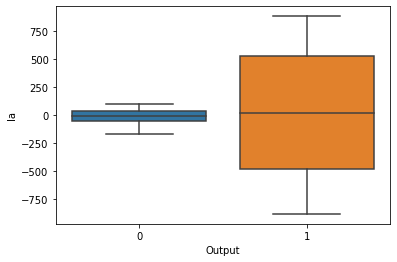

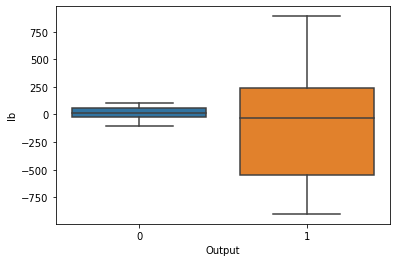

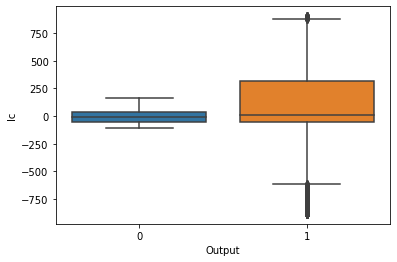

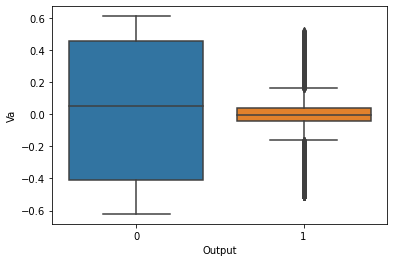

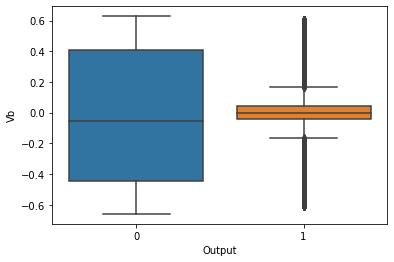

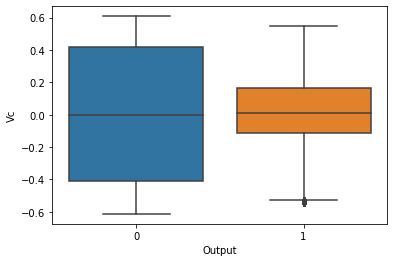

In [11]:
for ele in df.drop(['Output'], axis=1).columns:
  sns.boxplot(y=df[ele], x=df['Output'])
  plt.show()

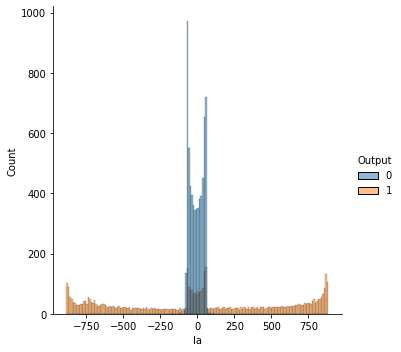

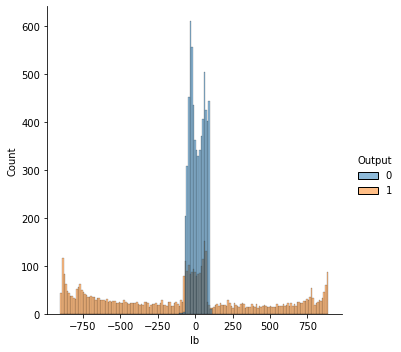

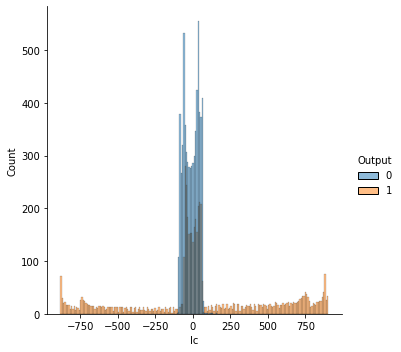

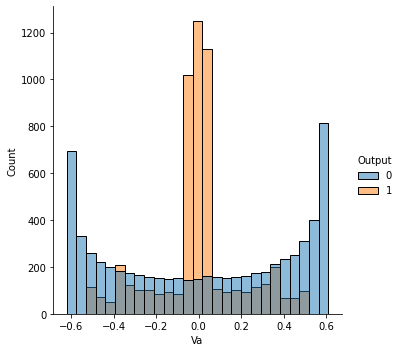

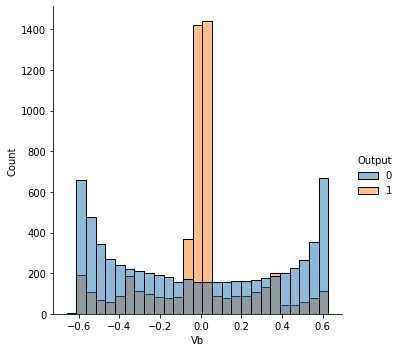

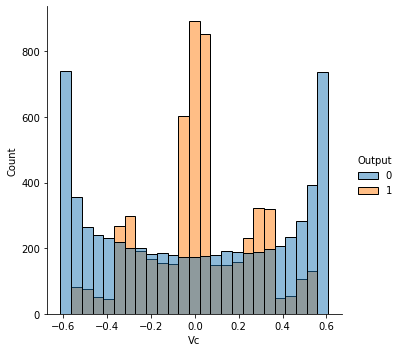

In [12]:
for ele in df.drop(['Output'], axis=1).columns:
  sns.displot(data=df, x=ele, hue='Output')
  plt.show()

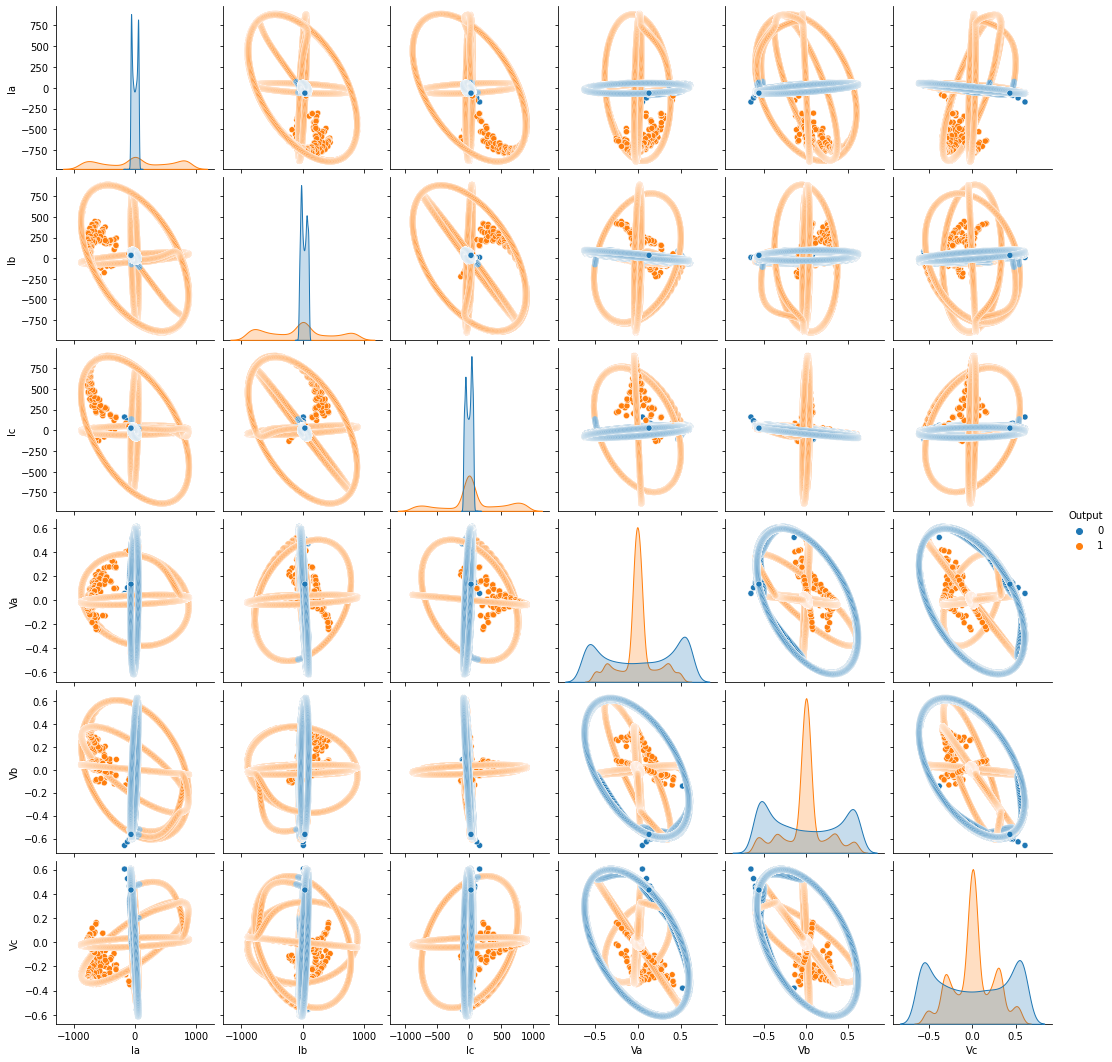

In [13]:
sns.pairplot(data=df, hue='Output')

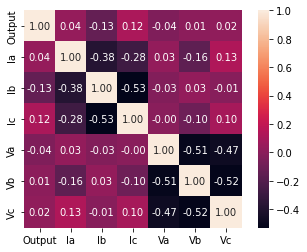

In [14]:
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')

In [46]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, confusion_matrix, accuracy_score

In [16]:
X = df.drop('Output', axis=1)
y = df['Output']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
svm_model = SVC(random_state=101, )

In [20]:
# random_search.fit(X_train, y_train)

In [21]:
svm_model.fit(scaled_X_train, y_train)

SVC(random_state=101)

In [22]:
svm_predict = svm_model.predict(scaled_X_test)

In [23]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1308
           1       1.00      0.96      0.98      1093

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



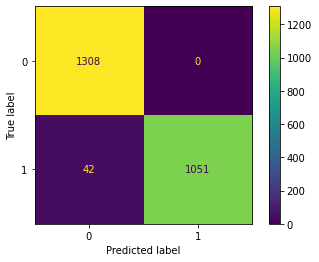

In [24]:
plot_confusion_matrix(svm_model, scaled_X_test, y_test)

In [25]:
rf_model = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=101)

In [26]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [100, 75, 125]
}

In [27]:
random_search = RandomizedSearchCV(rf_model, param_grid, scoring='accuracy', n_jobs=-1, cv=10, random_state=101)

In [28]:
# random_search.fit(X_train, y_train)

In [29]:
# random_search.best_estimator_.get_params()

In [30]:
rf_model.set_params(criterion='gini', max_depth=6, min_samples_leaf=75, min_samples_split=150)

RandomForestClassifier(max_depth=6, min_samples_leaf=75, min_samples_split=150,
                       n_jobs=-1, oob_score=True, random_state=101)

In [31]:
min_estimators = 15
max_estimators = 300

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_train, y_train)

    oob_error = 1 - rf_model.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

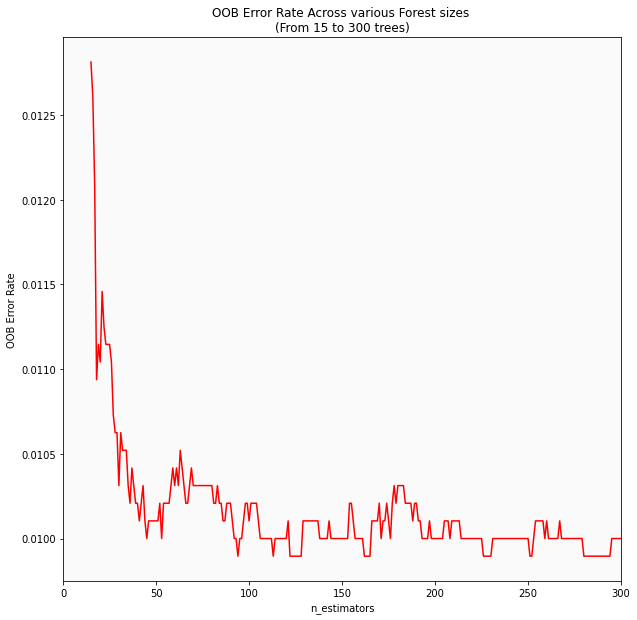

In [32]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 300)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

In [33]:
rf_model.set_params(n_estimators=125)

RandomForestClassifier(max_depth=6, min_samples_leaf=75, min_samples_split=150,
                       n_estimators=125, n_jobs=-1, oob_score=True,
                       random_state=101)

In [34]:
rf_predict = rf_model.predict(X_test)

In [35]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1308
           1       1.00      0.98      0.99      1093

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



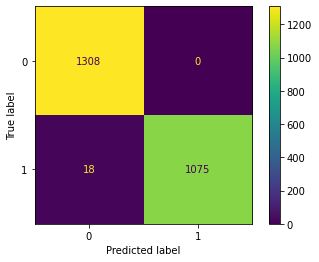

In [36]:
plot_confusion_matrix(rf_model, X_test, y_test)

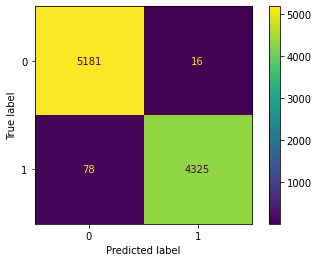

In [37]:
plot_confusion_matrix(rf_model, X_train, y_train)

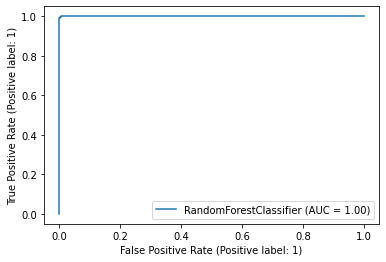

In [38]:
plot_roc_curve(rf_model, X_test, y_test)

In [39]:
xgb_model = xgb.XGBClassifier(n_jobs=-1, )

In [40]:
param_grid = {
    'max_depth': [3, 4, 5],
}

In [41]:
grid_model = GridSearchCV(xgb_model, param_grid, scoring='accuracy', n_jobs=-1, cv=10)

In [42]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5]}, scoring='accuracy')

In [43]:
grid_model.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [44]:
xgb_model.set_params(max_depth=5)

XGBClassifier(max_depth=5, n_jobs=-1)

In [48]:
min_estimators = 15
max_estimators = 300

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    xgb_model.set_params(n_estimators=i)
    xgb_model.fit(X_train, y_train)
    xgb_predict = xgb_model.predict(X_test)
    error_rate[i] = 1 - accuracy_score(y_test, xgb_predict)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

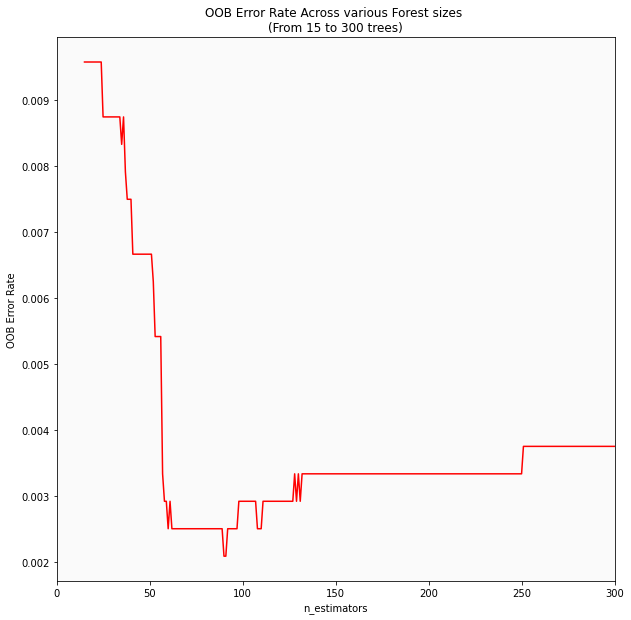

In [49]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 300)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

In [50]:
xgb_model.set_params(n_estimators=100)

XGBClassifier(max_depth=5, n_jobs=-1)

In [51]:
xgb_predict = xgb_model.predict(X_test)

In [52]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1308
           1       1.00      0.99      1.00      1093

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



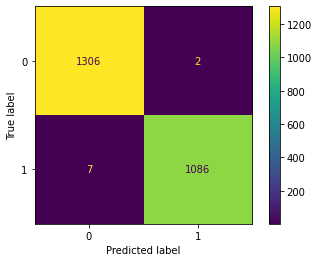

In [53]:
plot_confusion_matrix(xgb_model, X_test, y_test)

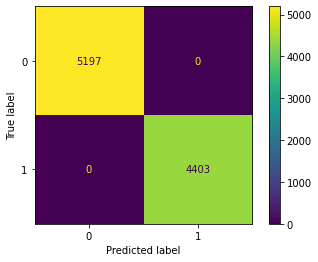

In [54]:
plot_confusion_matrix(xgb_model, X_train, y_train)

In [76]:
pd.DataFrame(xgb_model.feature_importances_, index=pd.Series(X.columns), columns=['feature_importances']).sort_values('feature_importances', ascending=False)

,feature_importances
Ib,0.656668
Ia,0.265846
Vb,0.024861
Va,0.021900
Ic,0.016689
Vc,0.014037


XGBoost model performs well compared to other model with 100% accuracy

In [79]:
#saving the model
model = joblib.dump(xgb_model, 'model.pkl')